# Plot the output of the HAIL-CAESAR landscape evolution model

This notebook uses some functions in `caesarpy/demio.py` to plot the output from the model [HAIL-CAESAR](https://github.com/dvalters/HAIL-CAESAR).

In [4]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import caesarpy as cp

import numpy as np
import pyvista as pv
from pyvista import set_plot_theme
set_plot_theme('document')

In [5]:
ascfile = '../../caesar-explore/riu-bergantes/paleo-v1/results/Elevations13680.asc'
ncols, nrows, geotransform, data_array = cp.demio.asc2numpy(ascfile)

In [6]:
dXY = geotransform[1]
xcorner = np.linspace(0.5*dXY, (ncols-0.5)*dXY, ncols)
ycorner = np.linspace(0.5*dXY, (nrows-0.5)*dXY, nrows)
z = data_array * 2
x,y = np.meshgrid(xcorner, ycorner)
grid = pv.StructuredGrid(x, y, z)

In [7]:
d = np.zeros_like(grid.points)
d[:, 1] = grid.points[:, 2] * 0.5

In [8]:
p = pv.Plotter(notebook=False)
p.add_mesh(grid, scalars=d[:, 1])
cpos = p.show()

In [9]:
ascfile = '../../caesar-explore/riu-bergantes/paleo-v1/results/WaterDepths13680.asc'
ncols, nrows, geotransform, data_array = cp.demio.asc2numpy(ascfile)

In [10]:
water = pv.StructuredGrid(x, y, data_array)

In [11]:
d = np.zeros_like(water.points)
d[:, 1] = water.points[:, 2]

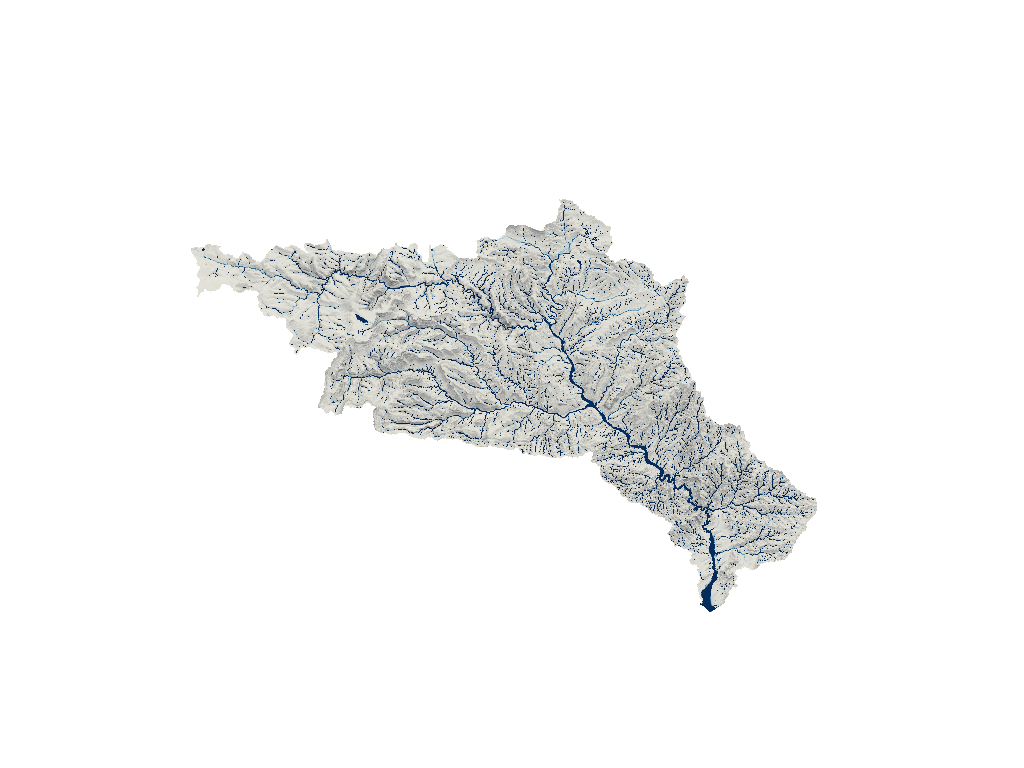

In [12]:
#cpos = [(2828.6061368377336, -10263.817257431388, 29122.020200506595),
#        (30970.413764259796, 16364.798323330917, 2320.7413303301937),
#        (0.41142201587402377, 0.39292919744752336, 0.8223980609457926)]

p = pv.Plotter(notebook=True)
p.add_mesh(grid, scalars=d[:,1], cmap='Blues', clim=[0,.1])
p.camera_position = cpos
p.show(screenshot='caesar.png')